# Iris Data set Analysis
EDA on Iris Dataset Questions: Work on the Data set and try to find the relation between the dimensions so that we can identify the type of Iris flower based on the given features

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris = pd.read_csv(r"F:\AIMS DATA\Analytics\python_data/iris.csv")

In [4]:
iris.shape

(150, 6)

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.Id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150], dtype=int64)

In [7]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Observation:

1. There are 150 datapoints (rows) and 6 columns
2. The name of the columns are Id ,SepalLengthCm ,SepalWidthCm ,PetalLengthCm ,PetalWidthCm,Species.

# Data Cleaning

In [12]:
iris.isna().sum().sort_values(ascending=True)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data is clean.

# Univariate Analysis

In [13]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [15]:
iris["SepalLengthCm"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

### 2-D scatter plot

<Figure size 600x400 with 0 Axes>

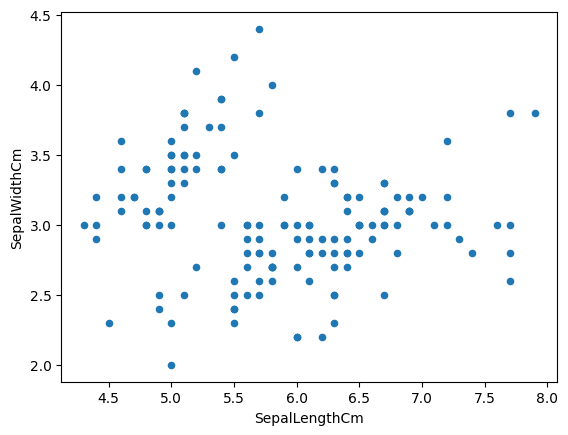

In [16]:
#2-D scatter plot

import matplotlib.pyplot as plt
#observe the scal and axis labels of the output plot
plt.figure(figsize=(6, 4))  # Adjust the width and height as needed
iris.plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm');
plt.show();

Observation:-
1. Note in the given output the left bottom corner pf the graph is (2.5,0) and not (0,0).
2. The scale of the graph is 2.5 on the X axis and 0.5 o Y axis #X axis varies upto 8 and y axis varies upto 4.5.
3. since the output has all blue datapoints we cannot differeentiate the different classses in the this.
4. Separating Versicolour and Verginica from each other is much harder as they have considerable overlap using these two features.

In [17]:
df_setosa = iris[iris["Species"]=="Iris-setosa"]
df_versicolor = iris[iris["Species"]=="Iris-versicolor"]
df_virginica = iris[iris["Species"]=="Iris-virginica"]

In [18]:
df_setosa.shape

(50, 6)

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import plotly.subplots as sp
import plotly.graph_objects as go

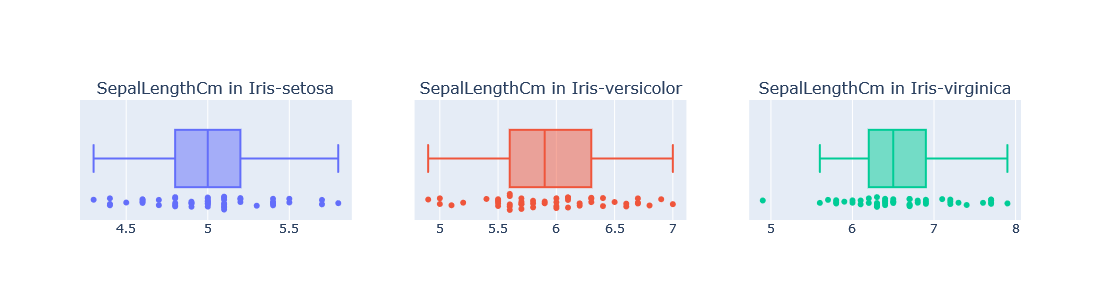

In [27]:

# Create subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=("SepalLengthCm in Iris-setosa", "SepalLengthCm in Iris-versicolor", "SepalLengthCm in Iris-virginica"))

# Plot boxplots
for i, df in enumerate([df_setosa, df_versicolor, df_virginica]):
    trace = go.Box(x=df["SepalLengthCm"], boxpoints="all", orientation='h', name='')
    fig.add_trace(trace, row=1, col=i+1)

# Update the layout
fig.update_layout(showlegend=False, height=300, width=900)

# Show the plot
fig.show()


### Boxplot

### 1.SepalLengthCm

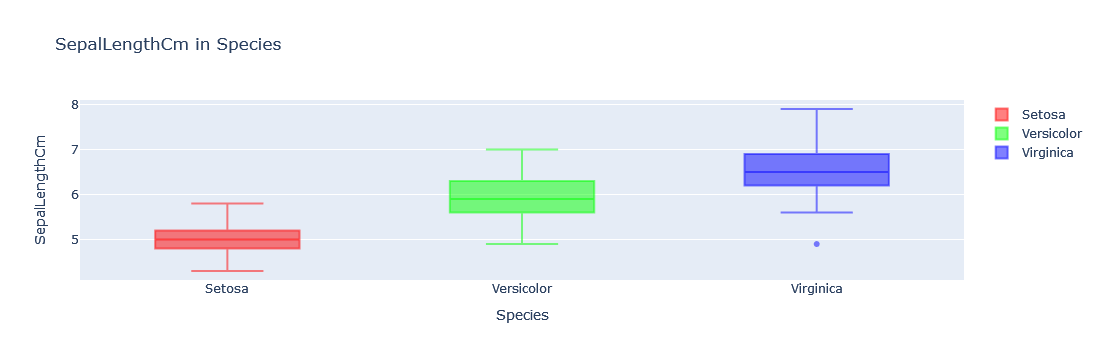

In [28]:
# Assuming df_setosa, df_versicolor, and df_virginica are DataFrames with your data

# Create boxplot traces for each species
trace_setosa = go.Box(y=df_setosa['SepalLengthCm'], name='Setosa', marker=dict(color='rgba(255,0,0,0.5)'))
trace_versicolor = go.Box(y=df_versicolor['SepalLengthCm'], name='Versicolor', marker=dict(color='rgba(0,255,0,0.5)'))
trace_virginica = go.Box(y=df_virginica['SepalLengthCm'], name='Virginica', marker=dict(color='rgba(0,0,255,0.5)'))

# Create a layout
layout = go.Layout(
    title='SepalLengthCm in Species',
    xaxis=dict(title='Species'),
    yaxis=dict(title='SepalLengthCm')
)

# Create a figure and add traces
fig = go.Figure(data=[trace_setosa, trace_versicolor, trace_virginica], layout=layout)

# Show the figure
fig.show()

sepal_length = [setosa{4.8-5.2},versicolor{5.6-6.3},virginica{6.2-6.9}]

### 2. SepalWidthCm

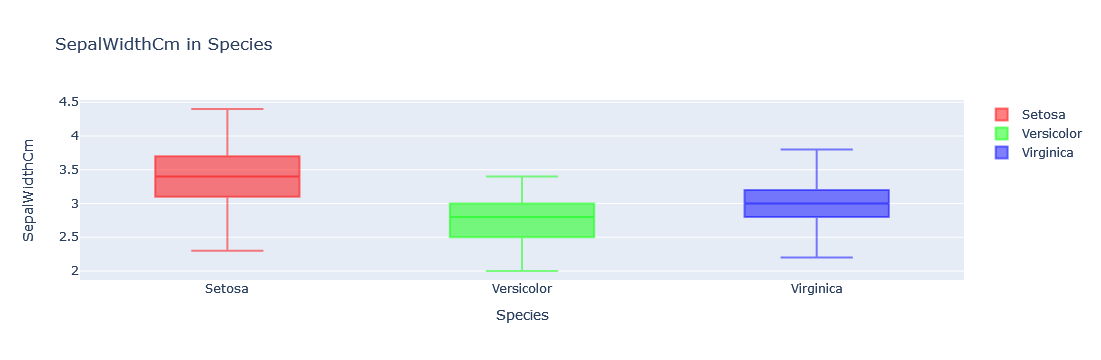

In [29]:
trace_setosa = go.Box(y=df_setosa['SepalWidthCm'], name='Setosa', marker=dict(color='rgba(255,0,0,0.5)'))
trace_versicolor = go.Box(y=df_versicolor['SepalWidthCm'], name='Versicolor', marker=dict(color='rgba(0,255,0,0.5)'))
trace_virginica = go.Box(y=df_virginica['SepalWidthCm'], name='Virginica', marker=dict(color='rgba(0,0,255,0.5)'))

# Create a layout
layout = go.Layout(
    title='SepalWidthCm in Species',
    xaxis=dict(title='Species'),
    yaxis=dict(title='SepalWidthCm')
)

# Create a figure and add traces
fig = go.Figure(data=[trace_setosa, trace_versicolor, trace_virginica], layout=layout)

# Show the figure
fig.show()

sepal_width =  [setosa{3.1-3.7},versicolor{2.5-3},virginica{2.8-3.2}]

### 3. PetalLengthCm

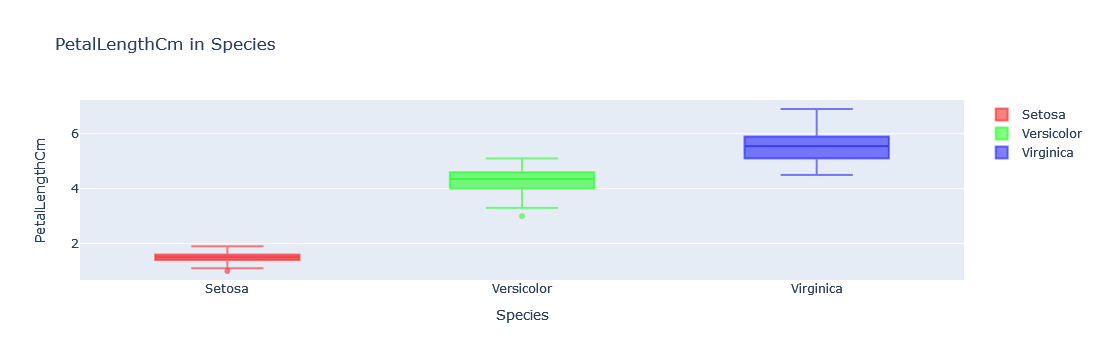

In [30]:
trace_setosa = go.Box(y=df_setosa['PetalLengthCm'], name='Setosa', marker=dict(color='rgba(255,0,0,0.5)'))
trace_versicolor = go.Box(y=df_versicolor['PetalLengthCm'], name='Versicolor', marker=dict(color='rgba(0,255,0,0.5)'))
trace_virginica = go.Box(y=df_virginica['PetalLengthCm'], name='Virginica', marker=dict(color='rgba(0,0,255,0.5)'))

# Create a layout
layout = go.Layout(
    title='PetalLengthCm in Species',
    xaxis=dict(title='Species'),
    yaxis=dict(title='PetalLengthCm')
)

# Create a figure and add traces
fig = go.Figure(data=[trace_setosa, trace_versicolor, trace_virginica], layout=layout)

# Show the figure
fig.show()


Petal_length = [setosa{1.4-1.6},versicolor{4-4.6},virginica{5.1-5.9}]

### 4. PetalWidthCm

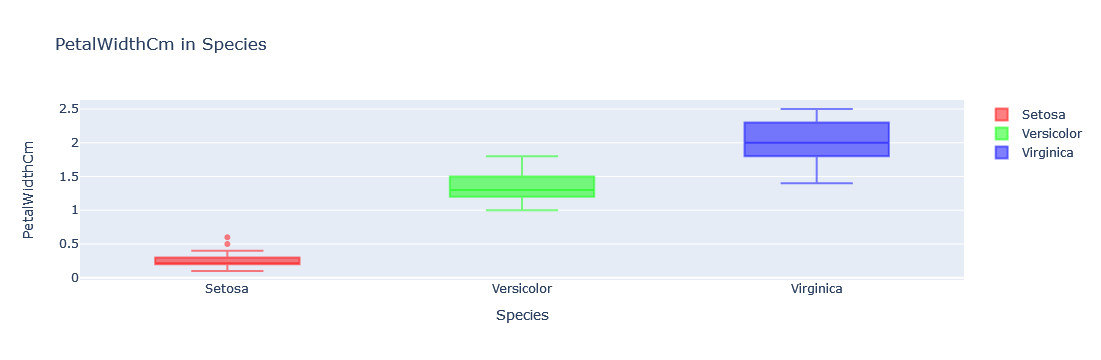

In [31]:
trace_setosa = go.Box(y=df_setosa['PetalWidthCm'], name='Setosa', marker=dict(color='rgba(255,0,0,0.5)'))
trace_versicolor = go.Box(y=df_versicolor['PetalWidthCm'], name='Versicolor', marker=dict(color='rgba(0,255,0,0.5)'))
trace_virginica = go.Box(y=df_virginica['PetalWidthCm'], name='Virginica', marker=dict(color='rgba(0,0,255,0.5)'))

# Create a layout
layout = go.Layout(
    title='PetalWidthCm in Species',
    xaxis=dict(title='Species'),
    yaxis=dict(title='PetalWidthCm')
)

# Create a figure and add traces
fig = go.Figure(data=[trace_setosa, trace_versicolor, trace_virginica], layout=layout)

# Show the figure
fig.show()

PetalWidthCm = [setosa{0.2-0.3},versicolor{1.2-1.5},virginica{1.8-2.3}]

### Observation:-


# Bivariate Analysis

In [32]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [33]:
df_pairplot = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']]

### 3-D scatter plot

<Figure size 600x400 with 0 Axes>

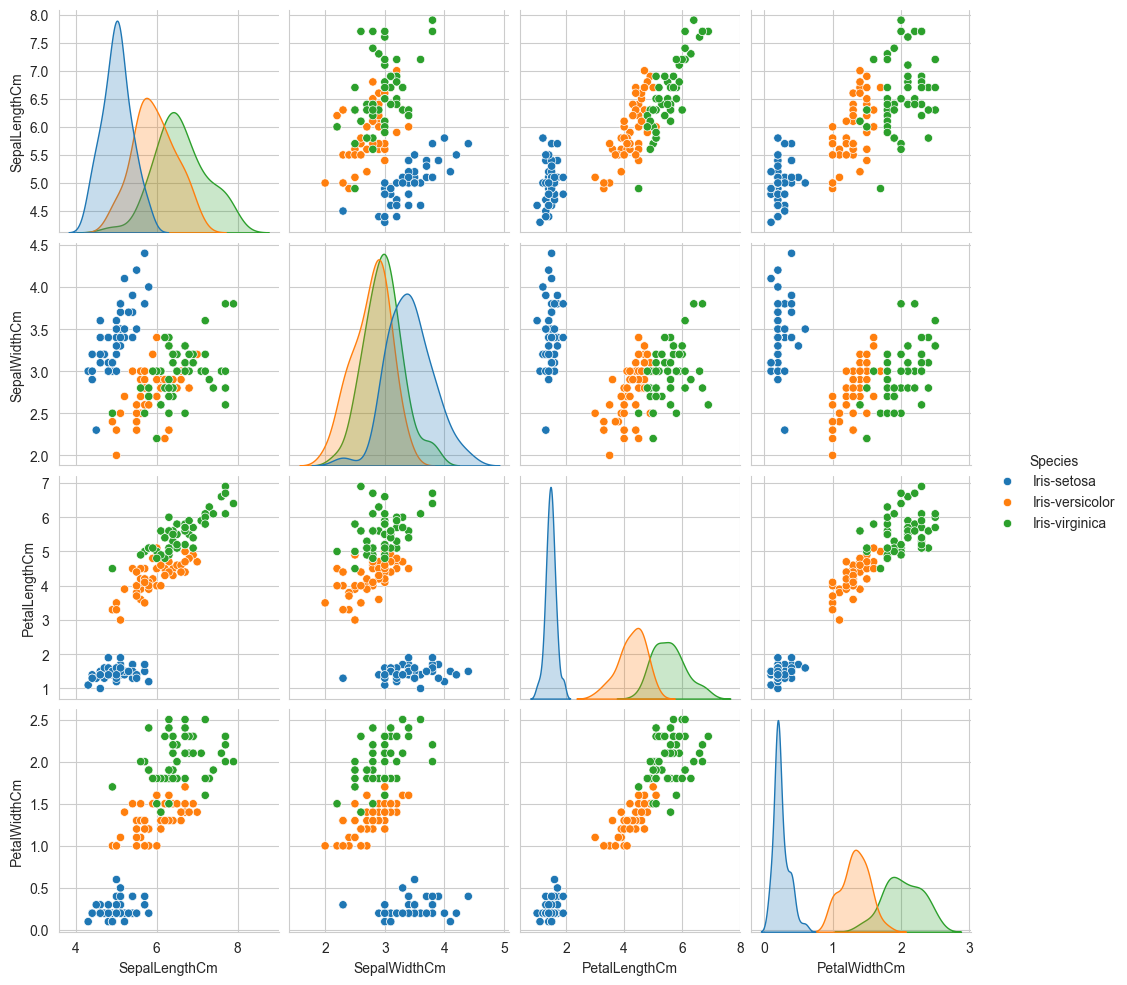

In [34]:
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")   #-- to show grid
sns.pairplot(df_pairplot,hue = 'Species')
plt.show()

Observation:-
1. There are 3 unique pair-plots in the plot matrix with a combination of sepalLength-petalWidth, sepalWidth-petalLength,petalLength-sepalWidth, petalWidth-sepalLength.

2. In the plot matrix, there are three unique pair-plots that display combinations of different iris flower features. These pair-plots are:

3. Sepal Length vs. Petal Width: This plot illustrates the relationship between sepal length and petal width, providing insights into how these two features are correlated in the iris dataset.

4. Sepal Width vs. Petal Length: This pair-plot showcases the relationship between sepal width and petal length, allowing for the examination of how these two features vary together within the dataset.

5. Petal Length vs. Sepal Width: This plot focuses on the interaction between petal length and sepal width, helping us understand the potential correlation or patterns between these two features in the iris dataset.

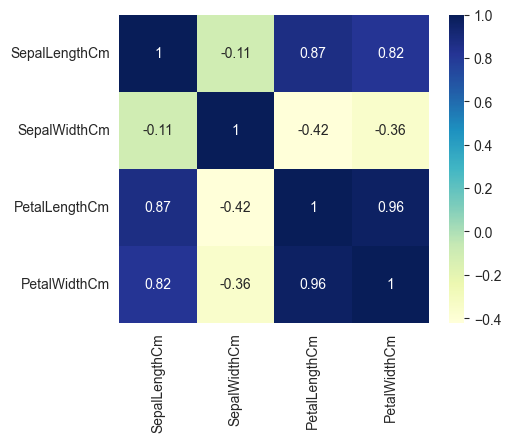

In [35]:
plt.figure(figsize=(5,4))
df_corr = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
sns.heatmap(df_corr.corr(),annot=True,cmap="YlGnBu")
plt.show()

### PDF and displots

In [36]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [41]:
def dist_cdf(col):
    plt.figure(figsize=(6,5))
    sns.set(style="whitegrid")
    sns.distplot(df_setosa[col], kde=True, color="black", label="setosa")
    sns.distplot(df_versicolor[col], kde=True, color="blue", label="versicolor")
    sns.distplot(df_virginica[col], kde=True, color="red", label="virginica")
    plt.legend()
    plt.show()

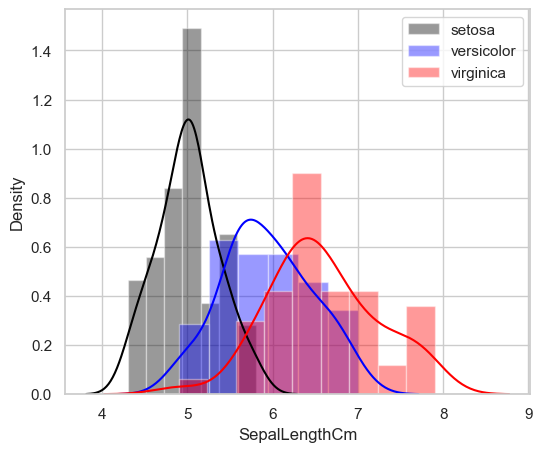

In [42]:
dist_cdf('SepalLengthCm')

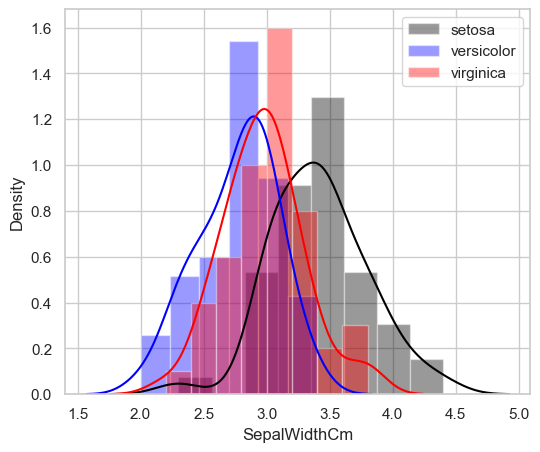

In [55]:
dist_cdf('SepalWidthCm')

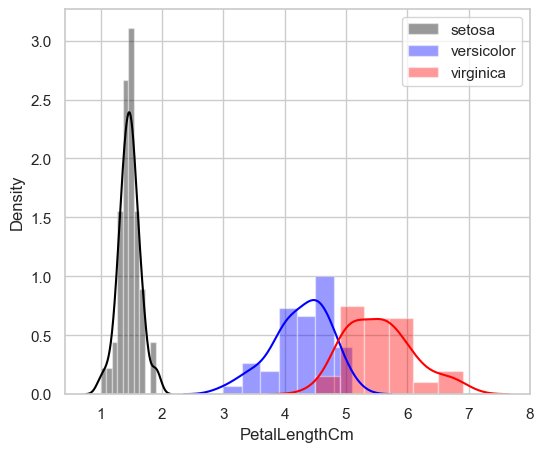

In [56]:
dist_cdf('PetalLengthCm')

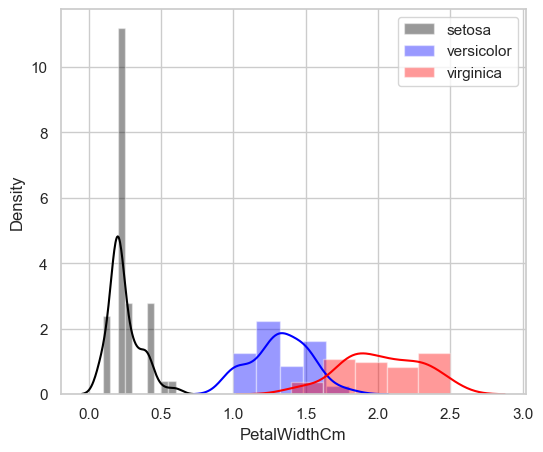

In [57]:
dist_cdf('PetalWidthCm')

### Observation:-
 
 Displot shows the distribution or frequency of 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', So that we can identify the types of species according to there diamensions.

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [60]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Figure size 300x300 with 0 Axes>

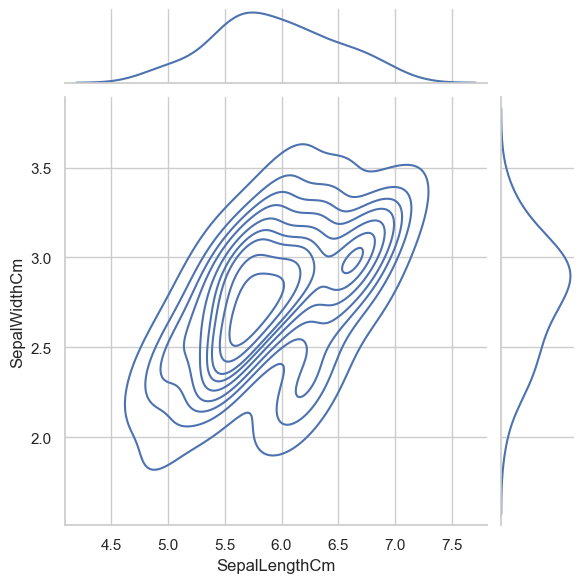

In [61]:
 plt.figure(figsize=(3,3))
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data = df_versicolor,kind='kde')
plt.show()

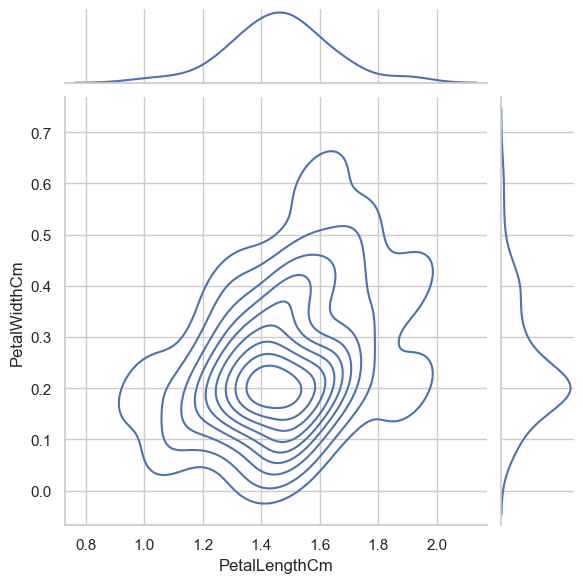

In [62]:
import seaborn as sns
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=df_setosa,kind='kde')
plt.show()

#### violin plot

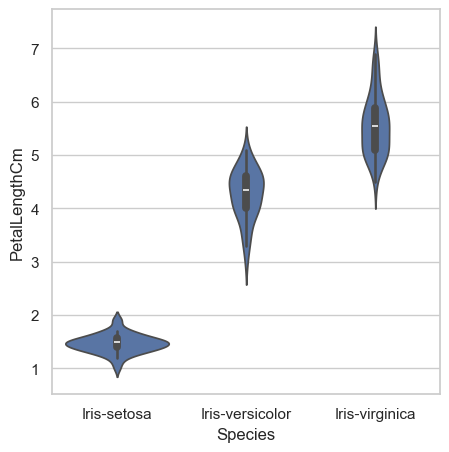

In [63]:
#violin plot

import seaborn as sns
plt.figure(figsize=(5,5))
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)
plt.show()

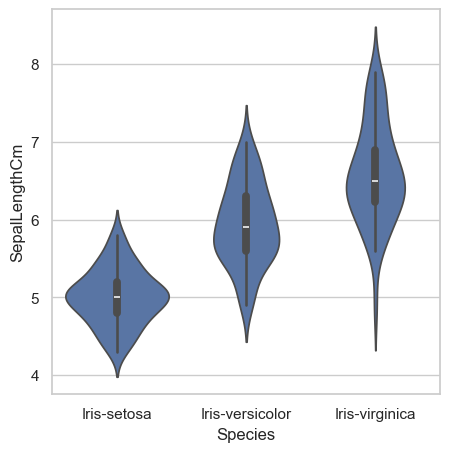

In [64]:
plt.figure(figsize=(5,5))
sns.violinplot(x='Species', y='SepalLengthCm', data=iris)
plt.show()

### Observations from the Iris Dataset:-